In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the data
file_path = "Data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Experience Years,Salary
0,9.5,97602.0
1,4.0,30165.0
2,2.0,73261.0
3,3.2,90174.0
4,5.1,61360.0


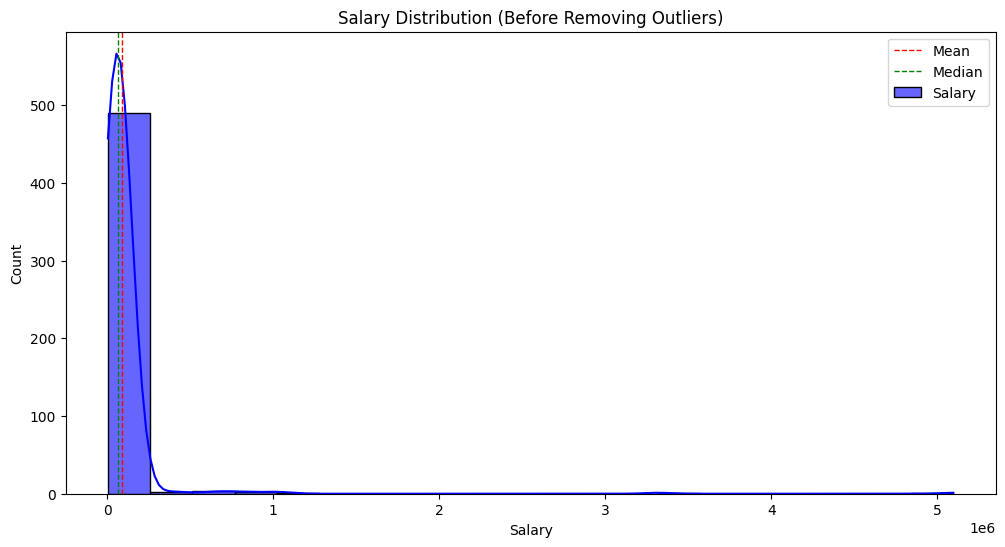

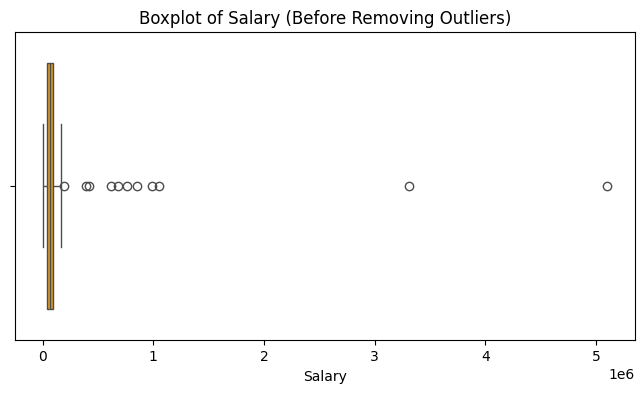

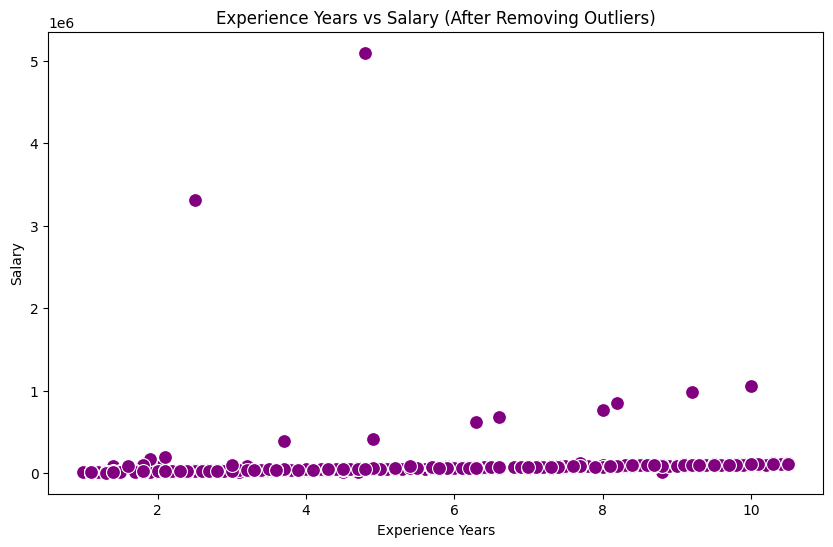

In [10]:
# Scatter plot for Experience Years vs Salary (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Experience Years'], y=data['Salary'], color='purple', s=100)
plt.title('Experience Years vs Salary (After Removing Outliers)')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()


In [6]:
# Define IQR for outlier detection
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
filtered_data = data[(data['Salary'] >= Q1 - 1.5 * IQR) & (data['Salary'] <= Q3 + 1.5 * IQR)]
print(f"Number of rows before removing outliers: {len(data)}")
print(f"Number of rows after removing outliers: {len(filtered_data)}")


Number of rows before removing outliers: 500
Number of rows after removing outliers: 489


In [7]:
# Calculate statistical parameters after removing outliers
stats_after = {
    'Mean': filtered_data.mean(),
    'Median': filtered_data.median(),
    'Range': filtered_data.max() - filtered_data.min(),
    'Standard Deviation': filtered_data.std(),
    'Variance': filtered_data.var(),
    'Interquartile Range': filtered_data.quantile(0.75) - filtered_data.quantile(0.25)
}

# Convert to a DataFrame for display
stats_after_df = pd.DataFrame(stats_after)
stats_after_df


,Mean,Median,Range,Standard Deviation,Variance,Interquartile Range
Experience Years,5.791770,5.9,9.5,2.843508,8.085540e+00,4.900000
Salary,61813.920473,62549.0,165675.0,31142.019586,9.698254e+08,53806.222222


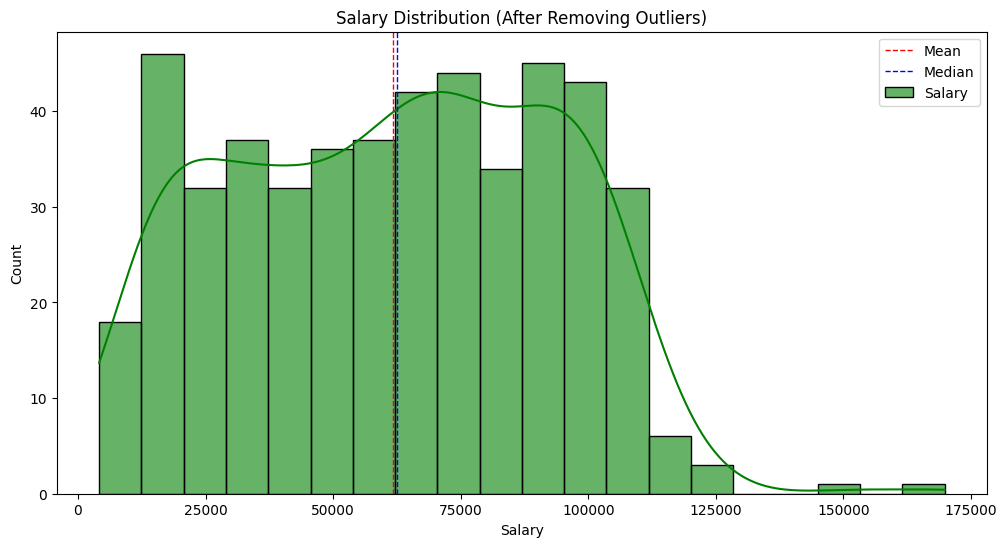

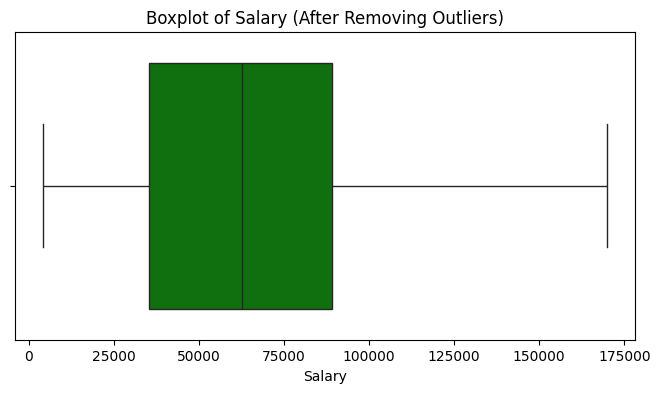

In [8]:
# Visualize the data distribution after removing outliers
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['Salary'], kde=True, bins=20, color='green', alpha=0.6, label='Salary')
plt.axvline(filtered_data['Salary'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(filtered_data['Salary'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.title('Salary Distribution (After Removing Outliers)')
plt.legend()
plt.show()

# Boxplot after removing outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=filtered_data['Salary'], color='green')
plt.title('Boxplot of Salary (After Removing Outliers)')
plt.show()


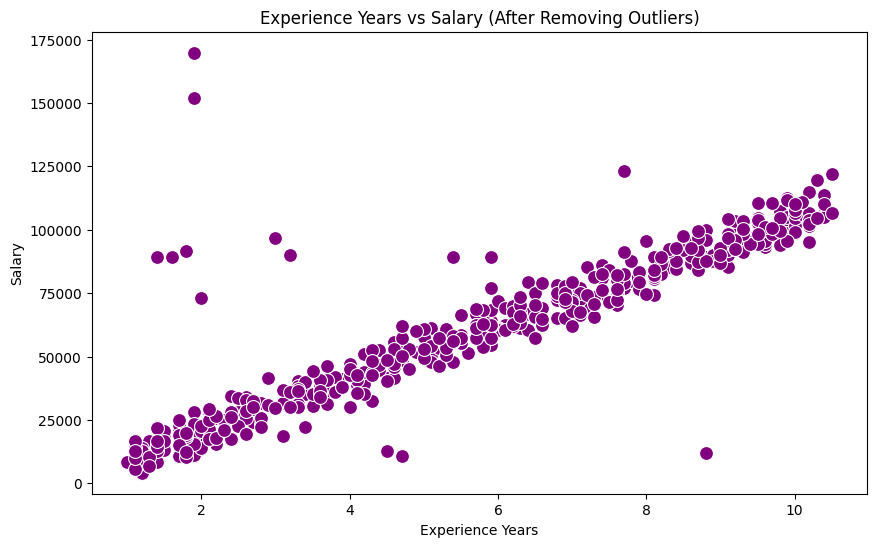

In [9]:
# Scatter plot for Experience Years vs Salary (After Removing Outliers)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['Experience Years'], y=filtered_data['Salary'], color='purple', s=100)
plt.title('Experience Years vs Salary (After Removing Outliers)')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()
